<a href="https://colab.research.google.com/github/erendagasan/hand-written-digit-classification/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import os
import cv2
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt

In [10]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [14]:
model = keras.Sequential(
    [
  keras.layers.AveragePooling2D(2, 1, input_shape=(28, 28, 1)),
  keras.layers.Conv2D(64, (2, 2), activation='relu'),
  keras.layers.MaxPool2D(2,2),
  keras.layers.Dropout(0.5),
  keras.layers.Conv2D(64, (2, 2), activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(10, activation='softmax')
]
)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=16, epochs=5)

Epoch 1/5
3750/3750 [==============================] - 11s 3ms/step - loss: 0.1995 - accuracy: 0.9398
Epoch 2/5
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0885 - accuracy: 0.9733
Epoch 3/5
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0710 - accuracy: 0.9784
Epoch 4/5
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0603 - accuracy: 0.9812
Epoch 5/5
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0517 - accuracy: 0.9838


In [15]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0618 - accuracy: 0.9803
0.061822112649679184
0.9803000092506409


In [49]:
image = X_test[3]
prediction = np.round(model.predict(np.array([image])))
prediction

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

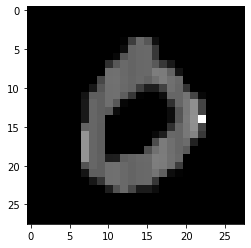

In [74]:
plt.imshow(image, cmap="Greys_r")

Your number is 7


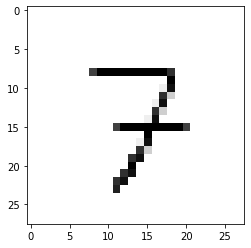

In [88]:
image_number = 10
img = cv2.imread('/content/digit{}.png'.format(image_number))[:,:,0]
img = np.invert(np.array([img]))
prediction = model.predict(img)
print("Your number is {}".format(np.argmax(prediction)))
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()